In [1]:
#Import Libraries
import matplotlib.pyplot as plt #Library that helps to plot graphs
import tensorflowjs as tfjs # Library for training and deploying machine learning models
import tensorflow as tf # Library for training and deploying machine learning models
import numpy as np #a general-purpose array-processing package
import pathlib #module which provides an object API for working with files and directories
import imghdr #determines the type of image contained in a file or byte stream
import glob #used to return all file paths that match a specific pattern
import PIL #an abbreviation of Python Imaging Library and it adds image processing to Python
import os #to interact with the underlying operating system

from pathlib import Path #provides an object API for working with files and directories
from tensorflow import keras
from tensorflow.keras import layers #callable object that takes as input one or more tensors and outputs one or more tensors
from tensorflow.keras.models import Sequential #Sequential API is used to create models layer-by-layer

In [2]:
#Set Path of the training images
data_dir = pathlib.Path("C:/Users/Ru/Desktop/Aruviyn/Year 3 Sem 2/FYP_System/sneaker_dataset/images/train")

In [6]:
#CODE TO CHECK IF IMAGES ARE ACCEPTED OR NOT BY TENSORFLOW


data_check = "C:/Users/Ru/Desktop/Aruviyn/Year 3 Sem 2/FYP_System/sneaker_dataset/images/train"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_check).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

C:\Users\Ru\Desktop\Aruviyn\Year 3 Sem 2\FYP_System\sneaker_dataset\images\train\Jordan 1 Low Black Toe\21.jpg is not an image
C:\Users\Ru\Desktop\Aruviyn\Year 3 Sem 2\FYP_System\sneaker_dataset\images\train\Jordan 1 Low Black Toe\43.jpg is not an image
C:\Users\Ru\Desktop\Aruviyn\Year 3 Sem 2\FYP_System\sneaker_dataset\images\train\Jordan 1 Low Black Toe\47.jpg is not an image
C:\Users\Ru\Desktop\Aruviyn\Year 3 Sem 2\FYP_System\sneaker_dataset\images\train\Jordan 1 Low Black Toe\5877571e-9648-4fff-ab5a-fe76e8c89bcf-500x500.jpg is not an image
C:\Users\Ru\Desktop\Aruviyn\Year 3 Sem 2\FYP_System\sneaker_dataset\images\train\Jordan 1 Low Black Toe\64958182_1689683061162230_628474309356ttt0636483_n_w1160.jpg is not an image
C:\Users\Ru\Desktop\Aruviyn\Year 3 Sem 2\FYP_System\sneaker_dataset\images\train\Jordan 1 Low Black Toe\air-jordan-1-low-reverse-black-toe-553560-163-release-date-2.jpg is not an image
C:\Users\Ru\Desktop\Aruviyn\Year 3 Sem 2\FYP_System\sneaker_dataset\images\train\Jor

In [3]:
#Check and print total number of images in the folder 
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

52206


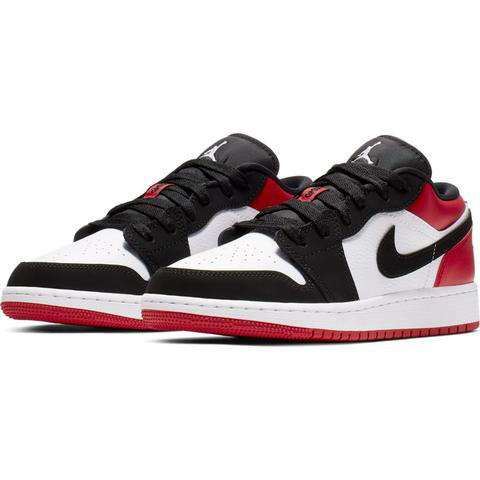

In [5]:
#Checking image from a particular folder
j1lbt = list(data_dir.glob('Jordan 1 Low Black Toe/*'))
PIL.Image.open(str(j1lbt[0]))

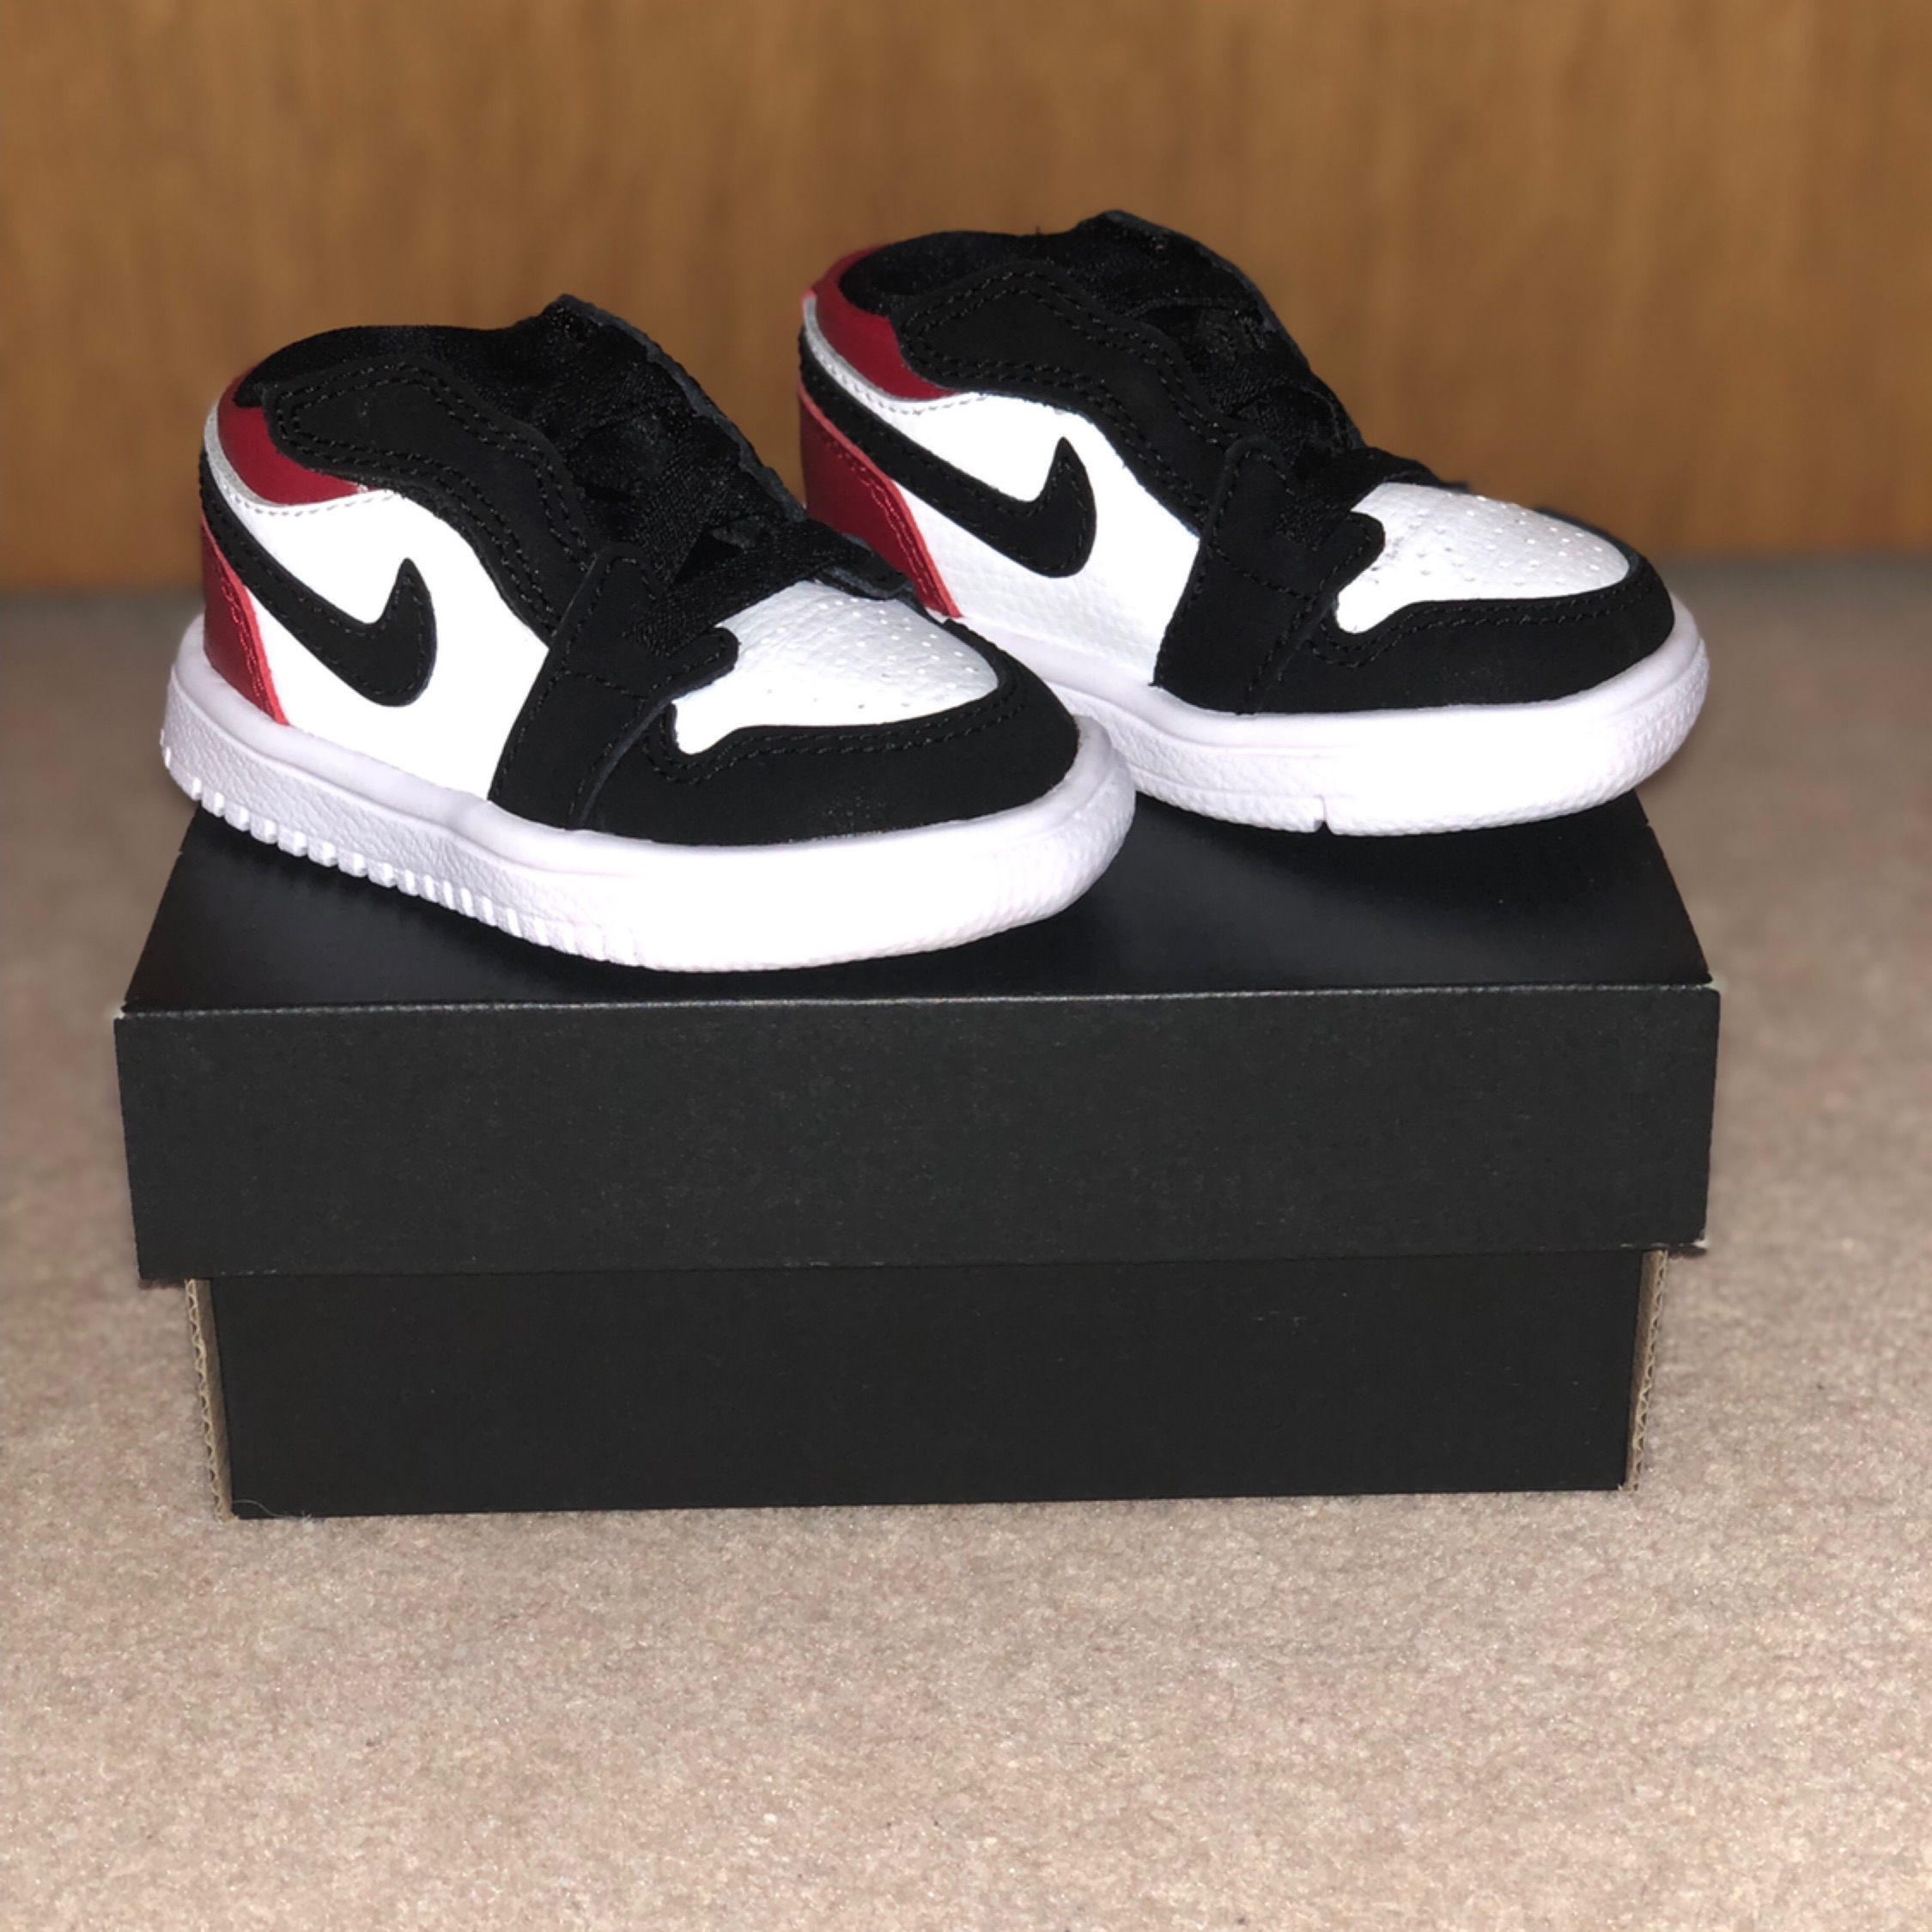

In [7]:
#checking different image from the same folder
PIL.Image.open(str(j1lbt[5]))

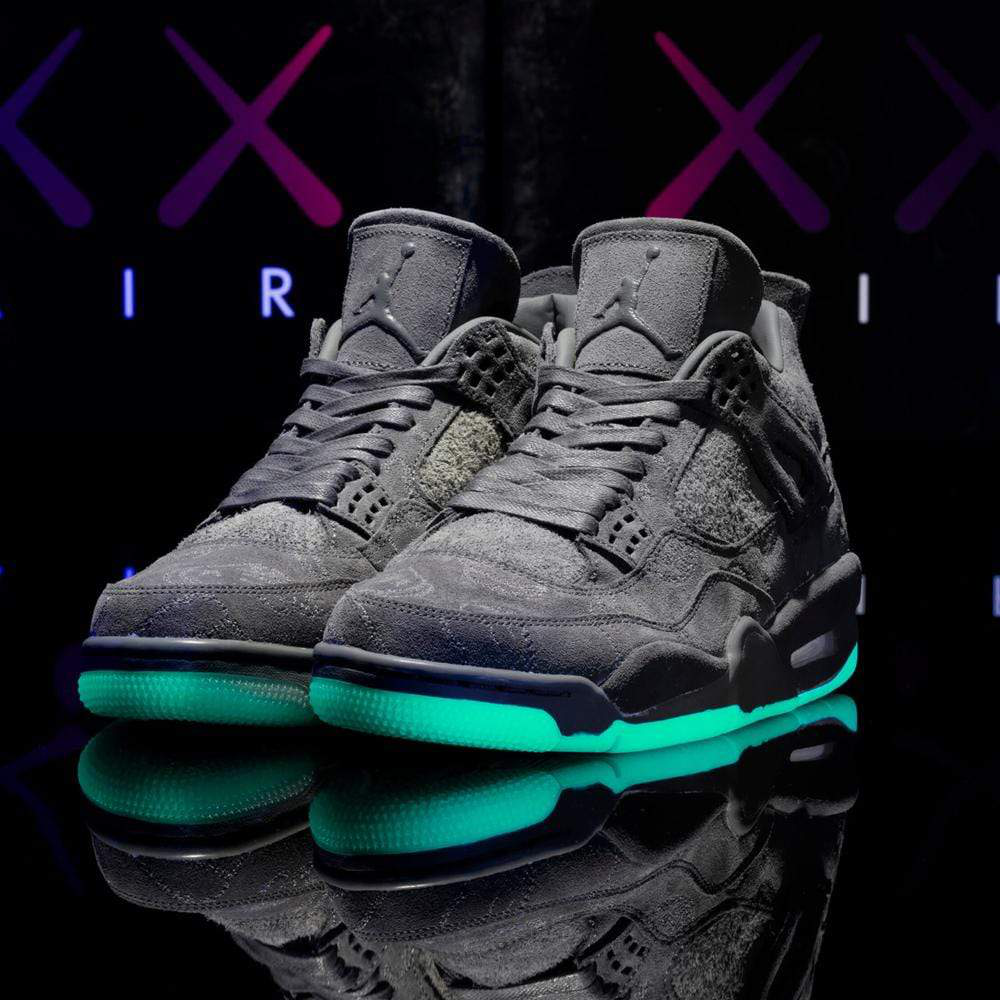

In [8]:
#Checking image from another folder
j4rk = list(data_dir.glob('Jordan 4 Retro Kaws/*'))
PIL.Image.open(str(j4rk[0]))

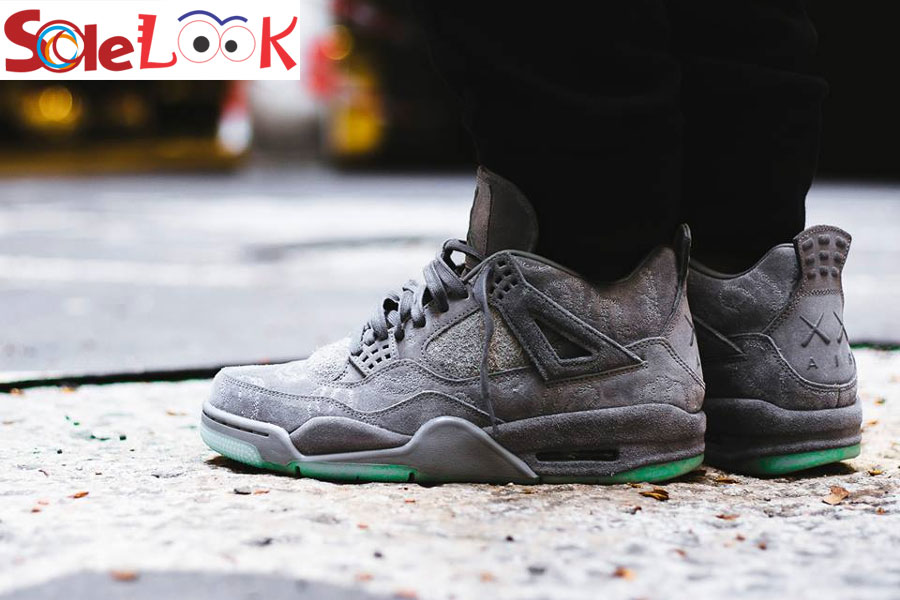

In [9]:
#Checking different image from the same folder
PIL.Image.open(str(j4rk[10]))

In [10]:
#Defining parameters for the loader 
batch_size = 32
img_height = 180
img_width = 180

In [11]:
#Validation split
#80% for training
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 52206 files belonging to 898 classes.
Using 41765 files for training.


In [12]:
#Validation split
#20% for testing / validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 52206 files belonging to 898 classes.
Using 10441 files for validation.


In [13]:
#Print all class names from training folder 
class_names = train_ds.class_names
print(class_names)

['A Bathing Ape Bapesta Kanye West College Dropout', 'A Bathing Ape Bapesta Ronnie Fieg Fiegsta Sand', 'ACE 16 PureControl Ultra Boost Kith Flamingos', 'ASICS GT-II Ronnie Fieg __High Risk___', 'ASICS Gel-Lyte III Afew __Koi___', 'ASICS Gel-Lyte III Hanon __Wildcats___', 'ASICS Gel-Lyte III Ronnie Fieg Militia (Special Box)', 'ASICS Gel-Lyte III Ronnie Fieg Super Green', 'ASICS Gel-Lyte III Ronnie Fieg __Flamingo___', 'ASICS Gel-Lyte III Ronnie Fieg __Homage__ (Special Box)_', 'ASICS Gel-Lyte III Ronnie Fieg __Leatherbacks___', 'ASICS Gel-Lyte III Ronnie Fieg __Mint Leaf___', 'ASICS Gel-Lyte III Ronnie Fieg __Salmon Toes___', 'ASICS Gel-Lyte III Woei __Cervidae___', 'Air Fear Of God 1 Black', 'Air Fear Of God 1 Frosted Spruce', 'Air Fear Of God 1 Orange Pulse', 'Air Fear Of God 1 Sail Black', 'Air Fear Of God 1 Yellow', 'Air Fear Of God Moccasin Black', 'Air Fear Of God Moccasin Particle Beige', 'Air Fear Of God Moccasin Pure Platinum', 'Air Fear Of God Raid Black', 'Air Fear of God Ra

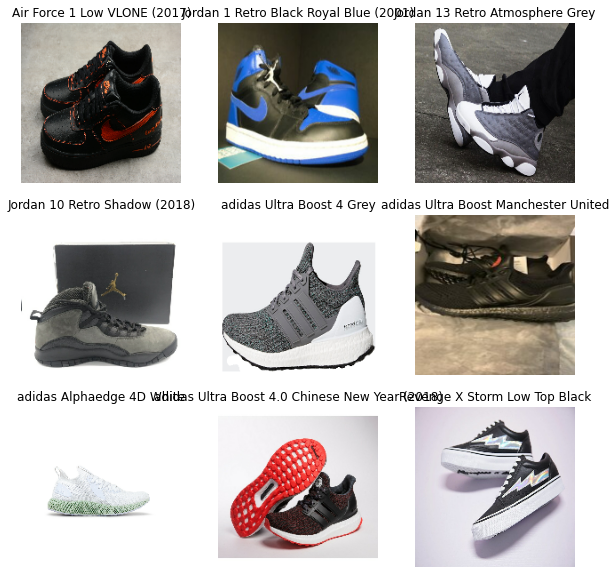

In [15]:
#Checking first 9 images from training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
#Manually iterate over the dataset and retrieve batches of images
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
#Configuring the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
#Standardize the data
normalization_layer = layers.Rescaling(1./255)

In [20]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) 

0.0019366156 0.9847973


In [23]:
#Create training model
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
#Compile the model and view the summary
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [25]:
#Train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1306/1306 [==============================] - 1440s 947ms/step - loss: 6.0535 - accuracy: 0.0216 - val_loss: 5.2065 - val_accuracy: 0.0539
Epoch 2/10
1306/1306 [==============================] - 1149s 880ms/step - loss: 4.5297 - accuracy: 0.1142 - val_loss: 4.3337 - val_accuracy: 0.1468
Epoch 3/10
1306/1306 [==============================] - 1143s 875ms/step - loss: 3.5446 - accuracy: 0.2451 - val_loss: 3.9964 - val_accuracy: 0.1984
Epoch 4/10
1306/1306 [==============================] - 1137s 870ms/step - loss: 2.7594 - accuracy: 0.3791 - val_loss: 4.0120 - val_accuracy: 0.2244
Epoch 5/10
1306/1306 [==============================] - 1139s 872ms/step - loss: 2.0878 - accuracy: 0.5042 - val_loss: 4.1833 - val_accuracy: 0.2334
Epoch 6/10
1306/1306 [==============================] - 1140s 872ms/step - loss: 1.5451 - accuracy: 0.6162 - val_loss: 4.6967 - val_accuracy: 0.2288
Epoch 7/10
1306/1306 [==============================] - 1137s 870ms/step - loss: 1.1337 - accuracy: 0.7081

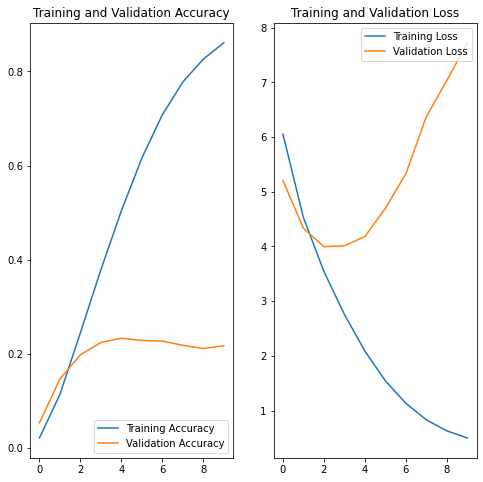

In [26]:
#Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
#Data augmentation for overfitting problem
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

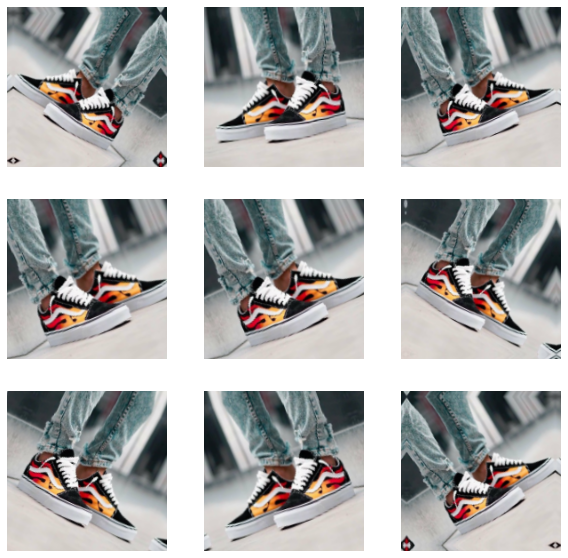

In [28]:
#Visualizing several augmentation images. Augmented data will be used for training. 
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [29]:
#Dropout layer method used to overcome overfitting
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
#Compile the model and view the summary
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [31]:
#Training the model
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
model.save('sneaker.model')

Epoch 1/15
1306/1306 [==============================] - 1352s 1s/step - loss: 5.9498 - accuracy: 0.0243 - val_loss: 5.1715 - val_accuracy: 0.0544
Epoch 2/15
1306/1306 [==============================] - 1337s 1s/step - loss: 4.5613 - accuracy: 0.1089 - val_loss: 4.3331 - val_accuracy: 0.1455
Epoch 3/15
1306/1306 [==============================] - 1329s 1s/step - loss: 3.8877 - accuracy: 0.1955 - val_loss: 4.2179 - val_accuracy: 0.1802
Epoch 4/15
1306/1306 [==============================] - 1331s 1s/step - loss: 3.4697 - accuracy: 0.2619 - val_loss: 3.8171 - val_accuracy: 0.2506
Epoch 5/15
1306/1306 [==============================] - 1333s 1s/step - loss: 3.1843 - accuracy: 0.3095 - val_loss: 3.5153 - val_accuracy: 0.2794
Epoch 6/15
1306/1306 [==============================] - 1330s 1s/step - loss: 2.9612 - accuracy: 0.3469 - val_loss: 3.4524 - val_accuracy: 0.2932
Epoch 7/15
1306/1306 [==============================] - 1328s 1s/step - loss: 2.8017 - accuracy: 0.3734 - val_loss: 3.3995 -

INFO:tensorflow:Assets written to: sneaker.model\assets


INFO:tensorflow:Assets written to: sneaker.model\assets


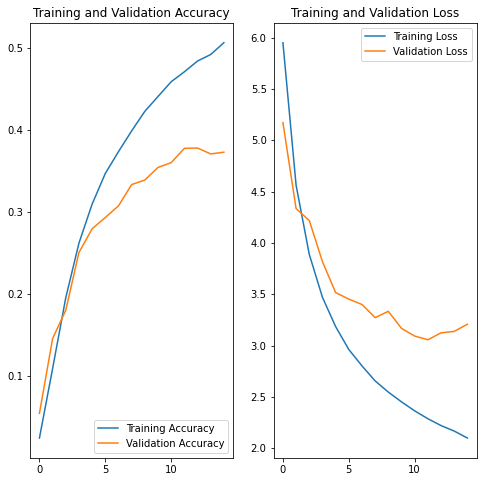

In [32]:
#Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
#Testing the model 
test_dir = pathlib.Path("C:/Users/Ru/Desktop/Aruviyn/Year 3 Sem 2/FYP_System/sneaker_dataset/images/test/1lbt.jpg")

img = tf.keras.utils.load_img(test_dir, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

model = tf.keras.models.load_model('sneaker.model')
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 114ms/step
This image most likely belongs to Jordan 1 Retro Black Toe (2016) with a 44.77 percent confidence.


In [4]:
#To run loaded model, run the this section first!
data_dir = pathlib.Path("C:/Users/Ru/Desktop/Aruviyn/Year 3 Sem 2/FYP_System/sneaker_dataset/images/train")

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

Found 52206 files belonging to 898 classes.
Using 41765 files for training.


In [15]:
#Saving the model from TensorFlow to TensorFlowjs
model = tf.keras.models.load_model('sneaker.model')
tfjs.converters.save_keras_model(model,"tfjsmodel")